## What is sentiment analysis:Supervised learning.
Essentially, sentiment analysis or sentiment classification fall into the broad category of text classification tasks where you are supplied with a phrase, or a list of phrases and your classifier is supposed to tell if the sentiment behind that is positive, negative or neutral. Sometimes, the third attribute is not taken to keep it a binary classification problem. In recent tasks, sentiments like "somewhat positive" and "somewhat negative" are also being considered.

In [1]:
import pandas as pd
#regular expressions
import re
#sentiment analysis package
#!pip install textblob
from textblob import TextBlob

#general text pre-processor
#!pip install nltk
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

import string

#tweet pre-processor 
#!pip install tweet-preprocessor
import preprocessor as p

import seaborn as sns
sns.set_theme(style="darkgrid")

[nltk_data] Downloading package punkt to /home/gerald/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/gerald/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
###Cleaning the tweets,
def clean_tweets(data_file,text_column):
    data_file = pd.read_csv(data_file)
    cleaned_text_list = []
    for text in data_file[text_column]:
        #use pre processor
        tweet = p.clean(text)

         #HappyEmoticons
        emoticons_happy = set([
            ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
            ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
            '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
            'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
            '<3'
            ])

        # Sad Emoticons
        emoticons_sad = set([
            ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
            ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
            ':c', ':{', '>:\\', ';('
            ])

        #Emoji patterns
        emoji_pattern = re.compile("["
                 u"\U0001F600-\U0001F64F"  # emoticons
                 u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                 u"\U0001F680-\U0001F6FF"  # transport & map symbols
                 u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                 u"\U00002702-\U000027B0"
                 u"\U000024C2-\U0001F251"
                 "]+", flags=re.UNICODE)

        #combine sad and happy emoticons
        emoticons = emoticons_happy.union(emoticons_sad)

        stop_words = set(stopwords.words('english'))
        word_tokens = nltk.word_tokenize(tweet)

        #after tweepy preprocessing the colon symbol left remain after      
        #removing mentions
        tweet = re.sub(r':', '', tweet)
        tweet = re.sub(r'‚Ä¶', '', tweet)

        #replace consecutive non-ASCII characters with a space
        tweet = re.sub(r'[^\x00-\x7F]+',' ', tweet)

        #remove emojis from tweet
        tweet = emoji_pattern.sub(r'', tweet)
        #filter using NLTK library append it to a string
        filtered_tweet = [w for w in word_tokens if not w in stop_words]

        #looping through conditions
        filtered_tweet = []    
        for w in word_tokens:
        #check tokens against stop words , emoticons and punctuations
            if w not in stop_words and w not in emoticons and w not in string.punctuation:
                filtered_tweet.append(w)
        tweet = ' '.join(filtered_tweet)
                
        cleaned_text_list.append(tweet)
    data_file.loc[:,'cleaned_text'] = cleaned_text_list
    
    return data_file

def sentiment_analyzer(clean_tweet):
    #calculate sentiment
    blob = TextBlob(clean_tweet)
    Sentiment = blob.sentiment     
    polarity = Sentiment.polarity
    subjectivity = Sentiment.subjectivity
    return polarity

def sentiment_classifier(clean_tweet):
    polarity= sentiment_analyzer(clean_tweet)
    if polarity > 0:
           return 'positive'
    elif polarity == 0:
           return 'neutral'
    else:
           return 'negative'
        
def data_sentiment(df,column):
    df['sentiment'] = df[column].apply(sentiment_classifier)
    return df

def sentiment_plots(df,column):
    ax = sns.countplot(x=column, data=df) 
    return ax

In [6]:
before_kenya_clean = clean_tweets('before_covid_KENYA.csv','text')
before_Nigeria_clean = clean_tweets('before_covid_Nigeria.csv','text')
before_SA_clean = clean_tweets('before_covid_SA.csv','text')

<AxesSubplot:xlabel='sentiment', ylabel='count'>

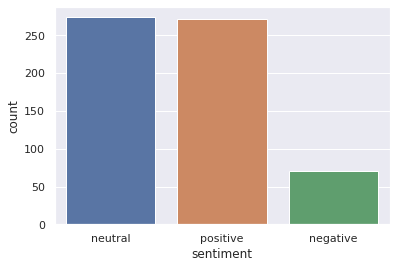

In [13]:
data = data_sentiment(before_kenya_clean,'text')
sentiment_plots(data,'sentiment')

In [16]:
"""data = data_sentiment(before_Nigeria_clean,'text')
sentiment_plots(data,'sentiment')"""

"data = data_sentiment(before_Nigeria_clean,'text')\nsentiment_plots(data,'sentiment')"

<AxesSubplot:xlabel='sentiment', ylabel='count'>

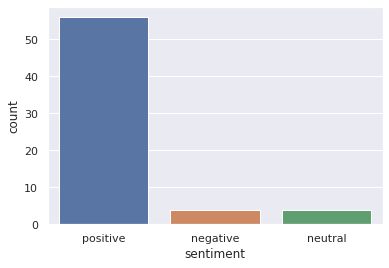

In [15]:
data = data_sentiment(before_SA_clean,'text')
sentiment_plots(data,'sentiment')

In [18]:
#reading data
during_covid_KENYA = clean_tweets("during_covid_KENYA.csv",'text')
during_covid_Nigeria = clean_tweets("during_covid_Nigeria.csv",'text')
during_covid_SA = clean_tweets("during_covid_SA.csv",'text')

<AxesSubplot:xlabel='sentiment', ylabel='count'>

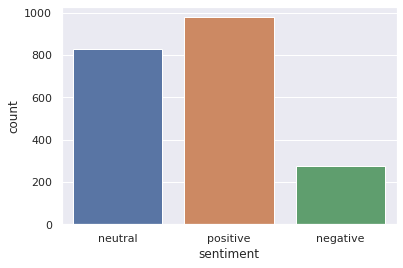

In [19]:
data = data_sentiment(during_covid_KENYA,'text')
sentiment_plots(data,'sentiment')

<AxesSubplot:xlabel='sentiment', ylabel='count'>

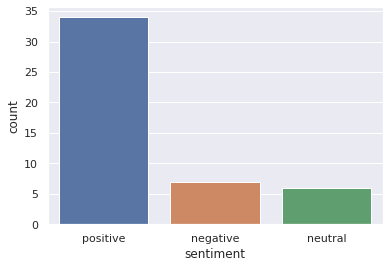

In [20]:
data = data_sentiment(during_covid_Nigeria,'text')
sentiment_plots(data,'sentiment')

<AxesSubplot:xlabel='sentiment', ylabel='count'>

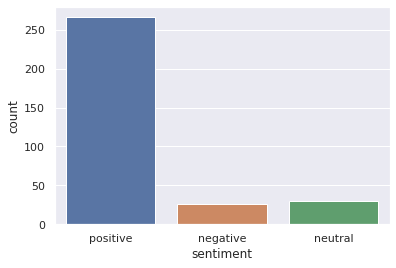

In [21]:
data = data_sentiment(during_covid_SA,'text')
sentiment_plots(data,'sentiment')

In [22]:
before_lockdown_KENYA = clean_tweets("before_lockdown_KENYA.csv","text")
before_lockdown_Nigeria = clean_tweets("before_lockdown_Nigeria.csv","text")
before_lockdown_SA = clean_tweets("before_lockdown_SA.csv","text")

<AxesSubplot:xlabel='sentiment', ylabel='count'>

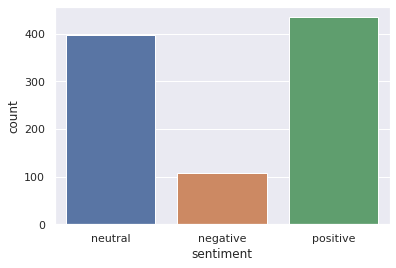

In [23]:
data = data_sentiment(before_lockdown_KENYA,'text')
sentiment_plots(data,'sentiment')

<AxesSubplot:xlabel='sentiment', ylabel='count'>

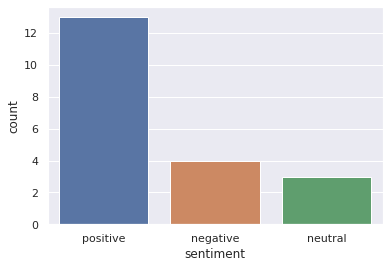

In [24]:
data = data_sentiment(before_lockdown_Nigeria,'text')
sentiment_plots(data,'sentiment')

<AxesSubplot:xlabel='sentiment', ylabel='count'>

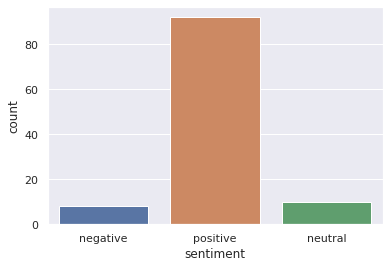

In [25]:
data = data_sentiment(before_lockdown_SA,'text')
sentiment_plots(data,'sentiment')

In [26]:
during_lockdown_KENYA = clean_tweets("during_lockdown_KENYA.csv","text")
during_lockdown_Nigeria = clean_tweets("during_lockdown_Nigeria.csv","text")
during_lockdown_SA = clean_tweets("during_lockdown_SA.csv","text")

<AxesSubplot:xlabel='sentiment', ylabel='count'>

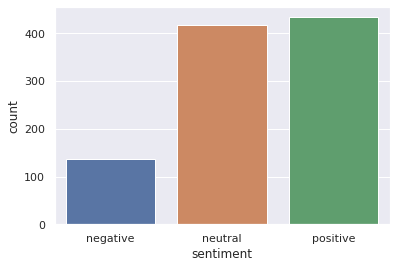

In [27]:
data = data_sentiment(during_lockdown_KENYA,'text')
sentiment_plots(data,'sentiment')

<AxesSubplot:xlabel='sentiment', ylabel='count'>

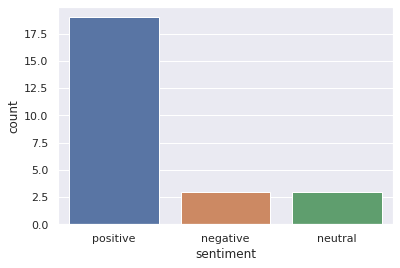

In [28]:
data = data_sentiment(during_lockdown_Nigeria,'text')
sentiment_plots(data,'sentiment')

<AxesSubplot:xlabel='sentiment', ylabel='count'>

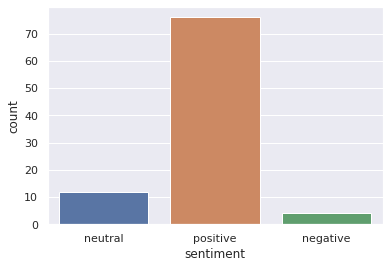

In [29]:
data = data_sentiment(during_lockdown_SA,'text')
sentiment_plots(data,'sentiment')

In [30]:
#reading data
after_lockdown_KENYA = clean_tweets("after_lockdown_KENYA.csv","text")
after_lockdown_Nigeria = clean_tweets("after_lockdown_Nigeria.csv","text")
after_lockdown_SA = clean_tweets("after_lockdown_SA.csv","text")

<AxesSubplot:xlabel='sentiment', ylabel='count'>

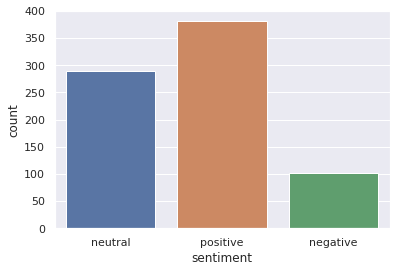

In [31]:
data = data_sentiment(after_lockdown_KENYA,'text')
sentiment_plots(data,'sentiment')

<AxesSubplot:xlabel='sentiment', ylabel='count'>

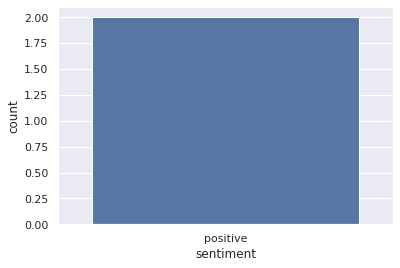

In [32]:
data = data_sentiment(after_lockdown_Nigeria,'text')
sentiment_plots(data,'sentiment')

<AxesSubplot:xlabel='sentiment', ylabel='count'>

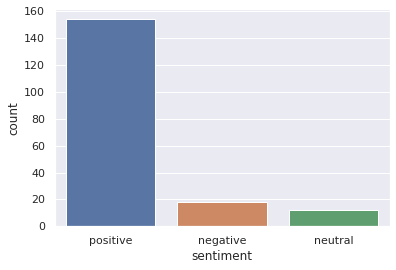

In [33]:
data = data_sentiment(after_lockdown_SA,'text')
sentiment_plots(data,'sentiment')